# Ejercicio 01
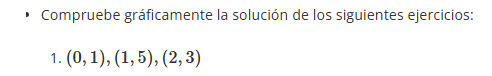

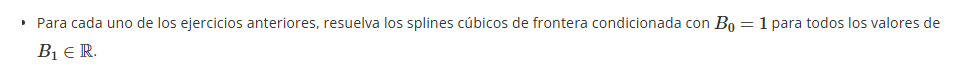

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def clamped_cubic_spline_B1(n, x, a, B0, B1):

    
    # Paso 1: Calcular h_i = x_{i+1} - x_i
    h = [x[i+1] - x[i] for i in range(n)]
    
    # Paso 2: Calcular alpha_0 y alpha_n especiales
    alpha = [0] * (n+1)
    alpha[0] = 3*(a[1] - a[0])/h[0] - 3*B0
    alpha[n] = 3*B1 - 3*(a[n] - a[n-1])/h[n-1]
    
    # Paso 3: Calcular alpha_i para i=1,...,n-1
    for i in range(1, n):
        alpha[i] = (3/h[i])*(a[i+1]-a[i]) - (3/h[i-1])*(a[i]-a[i-1])
    
    # Paso 4: Inicialización
    l = [0] * (n+1)
    mu = [0] * (n+1)
    z = [0] * (n+1)
    
    l[0] = 2*h[0]
    mu[0] = 0.5
    z[0] = alpha[0]/l[0]
    
    # Paso 5: Sustitución hacia adelante
    for i in range(1, n):
        l[i] = 2*(x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
    
    # Paso 6: Preparar para sustitución hacia atrás
    l[n] = h[n-1]*(2 - mu[n-1])
    z[n] = (alpha[n] - h[n-1]*z[n-1])/l[n]
    c = [0] * (n+1)
    c[n] = z[n]
    
    # Paso 7: Sustitución hacia atrás
    b = [0] * n
    d = [0] * n
    
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
    
    return [(a[j], b[j], c[j], d[j]) for j in range(n)]

def evaluate_spline(x, x_nodes, coefficients):
    """Evalúa el spline en el punto x"""
    # Encontrar el intervalo correcto
    for j in range(len(x_nodes)-1):
        if x_nodes[j] <= x <= x_nodes[j+1]:
            a, b, c, d = coefficients[j]
            dx = x - x_nodes[j]
            return a + b*dx + c*dx**2 + d*dx**3
    return 0

# Datos del problema
x_nodes = [0, 1, 2]
y_values = [1, 5, 3]
B0 = 1  # f'(x0) fijo
B1_values = np.linspace(-10, 10, 100)  # Valores de B1 a explorar

# Crear la figura para la animación
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-5, 10)
ax.grid(True)
ax.set_title('Variación del spline cúbico al cambiar B1 (B0=1 fijo)')
ax.set_xlabel('x')
ax.set_ylabel('S(x)')

# Graficar los puntos de datos
ax.plot(x_nodes, y_values, 'ro', label='Puntos de datos')

# Crear línea para el spline
line, = ax.plot([], [], 'b-', lw=2, label='Spline cúbico')
text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Función de inicialización
def init():
    line.set_data([], [])
    text.set_text('')
    return line, text

# Función de animación
def animate(i):
    B1 = B1_values[i]
    coefficients = clamped_cubic_spline_B1(len(x_nodes)-1, x_nodes, y_values, B0, B1)
    
    # Evaluar el spline en muchos puntos para graficar suavemente
    x_plot = np.linspace(x_nodes[0], x_nodes[-1], 100)
    y_plot = [evaluate_spline(x, x_nodes, coefficients) for x in x_plot]
    
    line.set_data(x_plot, y_plot)
    text.set_text(f'B1 = {B1:.2f}')
    return line, text

# Crear la animación
ani = FuncAnimation(fig, animate, frames=len(B1_values),
                    init_func=init, blit=True, interval=100)

# Mostrar la animación
plt.legend()
plt.close()  # Evita que se muestre la figura estática
HTML(ani.to_jshtml())